In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import spatial
import pickle
import numpy as np
import numba as nb

In [7]:
#os.chdir("prog2-2024-c2-barab")

In [8]:
df = pd.read_csv("solution-1/input.csv")
query_df = pd.read_csv("solution-1/query.csv")

<Axes: ylabel='Density'>

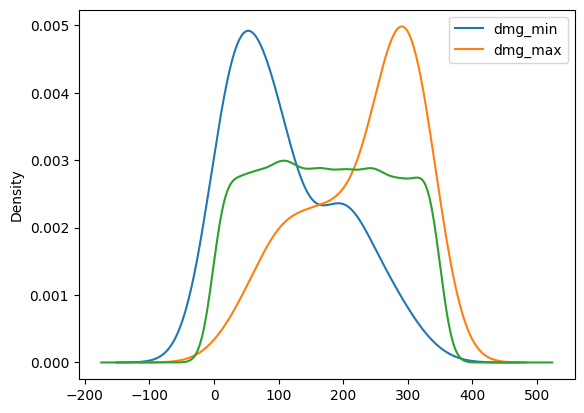

In [9]:
query_df[["dmg_min","dmg_max"]].plot.kde()
df["dmg"].plot.kde()

In [10]:
#Preproc
for dt in df["dmg_type"].unique():
    #print(dt)
    tree = spatial.cKDTree(df.loc[(df["dmg_type"] == dt),["x","y"]])
    with open("notebook_folder/tree_{}.pkl".format(dt),"wb") as file:
        pickle.dump(tree, file)
    """
    out_df = df.loc[(df["dmg_type"] == dt),["x","y","dmg"]]
    with open("notebook_folder/data_{}.pkl".format(dt),"wb") as file:
        pickle.dump(out_df, file)
    """
# Should this be sorted?
df[["dmg","dmg_type"]].to_pickle("notebook_folder/input.pkl")
with open("notebook_folder/dtypes.npy","wb") as file:
    np.save(file,df["dmg_type"].unique())
    



In [11]:
#Compute load
with open("notebook_folder/dtypes.npy","rb") as file:
    dtypes = np.load(file,allow_pickle=True)
for dt in dtypes:
    globals()["tree_" + dt] = pickle.load(open("notebook_folder/tree_{}.pkl".format(dt),"rb"))
    #globals()["df_" + dt] = pickle.load(open("notebook_folder/data_{}.pkl".format(dt),"rb"))
df_i = pd.read_pickle("notebook_folder/input.pkl")

  

In [12]:
# check function
@nb.njit
def check_numbers_between_numba(lst, min_val, max_val):
    for num in lst:
        if min_val <= num <= max_val:
            return True
    return False

In [20]:
# Compute calculate
#Probably can be parallelize
out_df = pd.DataFrame()
counter_df = pd.DataFrame()
for dt in dtypes:
    dmg_list = []
    counter_list = []
    range_list = []
    temp_dmgs = df_i.loc[(df_i["dmg_type"] == dt),["dmg"]].to_numpy()
    for idx, row in query_df.iterrows():
        print("current id:",idx)
        if check_numbers_between_numba(temp_dmgs,row["dmg_min"],row["dmg_max"]):
            counter = 1
            while True:
                if counter == 1:
                    index = globals()["tree_" + dt].query(row[["x","y"]])[1]  
                else:
                    index = globals()["tree_" + dt].query(row[["x","y"]],k=counter)[1][-1]
                print(df_i.loc[index,"dmg"],row["dmg_max"],row["dmg_min"])
                #rewrite this with function!
                if (df_i.loc[index,"dmg"] >= row["dmg_min"]) & (df_i.loc[index,"dmg"] <= row["dmg_max"]):
                    dmg_list.append(df_i.loc[index,"dmg"])
                    break
                else:
                    counter += 1
        else:
            dmg = 0
        counter_list.append(counter)
        range_list.append(row["dmg_max"]-row["dmg_min"])
    out_df[dt] = dmg_list
    counter_df = counter_df.assign(
    counter = counter_list,
    range_v = range_list
)
            
        

current id: 0
284 104.27745474661135 92.39818756305002
140 104.27745474661135 92.39818756305002
158 104.27745474661135 92.39818756305002
247 104.27745474661135 92.39818756305002
255 104.27745474661135 92.39818756305002
110 104.27745474661135 92.39818756305002
13 104.27745474661135 92.39818756305002
50 104.27745474661135 92.39818756305002
59 104.27745474661135 92.39818756305002
260 104.27745474661135 92.39818756305002
166 104.27745474661135 92.39818756305002
247 104.27745474661135 92.39818756305002
174 104.27745474661135 92.39818756305002
290 104.27745474661135 92.39818756305002
203 104.27745474661135 92.39818756305002
258 104.27745474661135 92.39818756305002
214 104.27745474661135 92.39818756305002
137 104.27745474661135 92.39818756305002
345 104.27745474661135 92.39818756305002
246 104.27745474661135 92.39818756305002
232 104.27745474661135 92.39818756305002
64 104.27745474661135 92.39818756305002
281 104.27745474661135 92.39818756305002
45 104.27745474661135 92.39818756305002
130 104

In [14]:
out_df = pd.DataFrame()
for dt in dtypes:
    dmg_list = []
    temp_dmgs = df_i.loc[(df_i["dmg_type"] == dt),["dmg"]].to_numpy()
    for idx, row in query_df.iterrows():
        print("current id:",idx)
        #if check_numbers_between_numba(temp_dmgs,row["dmg_min"],row["dmg_max"]):
        index = globals()["tree_" + dt].query(row[["x","y"]])[1] 

        dmg_list.append(df_i.loc[index,"dmg"])


    out_df[dt] = dmg_list


current id: 0
current id: 1
current id: 2
current id: 3
current id: 4
current id: 5
current id: 6
current id: 7
current id: 8
current id: 9
current id: 10
current id: 11
current id: 12
current id: 13
current id: 14
current id: 15
current id: 16
current id: 17
current id: 18
current id: 19
current id: 20
current id: 21
current id: 22
current id: 23
current id: 24
current id: 25
current id: 26
current id: 27
current id: 28
current id: 29
current id: 30
current id: 31
current id: 32
current id: 33
current id: 34
current id: 35
current id: 36
current id: 37
current id: 38
current id: 39
current id: 40
current id: 41
current id: 42
current id: 43
current id: 44
current id: 45
current id: 46
current id: 47
current id: 48
current id: 49
current id: 0
current id: 1
current id: 2
current id: 3
current id: 4
current id: 5
current id: 6
current id: 7
current id: 8
current id: 9
current id: 10
current id: 11
current id: 12
current id: 13
current id: 14
current id: 15
current id: 16
current id: 17


In [17]:
# Original
df = pd.read_csv("solution-1/input.csv")
query_df = pd.read_csv("solution-1/query.csv")

damage_types = df["dmg_type"].unique()
out = []
for idx, row in query_df.iterrows():
    out_row = {}
    for dt in damage_types:
        sub_df = df.loc[
            (df["dmg_type"] == dt)
           & (df["dmg"] >= row["dmg_min"])
           & (df["dmg"] <= row["dmg_max"]),
            ["x", "y", "dmg"],
        ]
        if sub_df.empty:
            out_row[dt] = 0
        else:
            diffs = ((sub_df[["x", "y"]] - row) ** 2).sum(axis=1)
            out_row[dt] = sub_df.iloc[diffs.argmin(), 2]
        #print(out_row)

    out.append(out_row)

original_out = pd.DataFrame(out)

In [18]:
%%timeit
# Compute calculate
#Probably can be parallelize
out_df = pd.DataFrame()
for dt in dtypes:
    dmg_list = []
    temp_dmgs = df_i.loc[(df_i["dmg_type"] == dt),["dmg"]].to_numpy()
    for idx, row in query_df.iterrows():
        #print("current id:",idx)
        if check_numbers_between_numba(temp_dmgs,row["dmg_min"],row["dmg_max"]):
            counter = 1
            while True:
                if counter == 1:
                    index = globals()["tree_" + dt].query(row[["x","y"]])[1]  
                else:
                    index = globals()["tree_" + dt].query(row[["x","y"]],k=counter)[1][-1]
                #print(df_i.loc[index,"dmg"],row["dmg_max"],row["dmg_min"])
                #rewrite this with function!
                if (df_i.loc[index,"dmg"] >= row["dmg_min"]) & (df_i.loc[index,"dmg"] <= row["dmg_max"]):
                    dmg_list.append(df_i.loc[index,"dmg"])
                    break
                else:
                    counter += 1
        else:
            dmg = 0
    out_df[dt] = dmg_list

current id: 0
284 104.27745474661135 92.39818756305002
140 104.27745474661135 92.39818756305002
158 104.27745474661135 92.39818756305002
247 104.27745474661135 92.39818756305002
255 104.27745474661135 92.39818756305002
110 104.27745474661135 92.39818756305002
13 104.27745474661135 92.39818756305002
50 104.27745474661135 92.39818756305002
59 104.27745474661135 92.39818756305002
260 104.27745474661135 92.39818756305002
166 104.27745474661135 92.39818756305002
247 104.27745474661135 92.39818756305002
174 104.27745474661135 92.39818756305002
290 104.27745474661135 92.39818756305002
203 104.27745474661135 92.39818756305002
258 104.27745474661135 92.39818756305002
214 104.27745474661135 92.39818756305002
137 104.27745474661135 92.39818756305002
345 104.27745474661135 92.39818756305002
246 104.27745474661135 92.39818756305002
232 104.27745474661135 92.39818756305002
64 104.27745474661135 92.39818756305002
281 104.27745474661135 92.39818756305002
45 104.27745474661135 92.39818756305002
130 104

In [57]:
%%timeit
# Compute calculate
#Probably can be parallelize
for dt in dtypes:
    temp_dmgs = df_i.loc[(df_i["dmg_type"] == dt),["dmg"]].to_numpy()
    for idx, row in query_df.iterrows():
        #print("current id:",idx)
        if check_numbers_between_numba(temp_dmgs,row["dmg_min"],row["dmg_max"]):
            pass
        else:
            pass

36.2 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
id

511

In [47]:
os.getcwd()

'c:\\Projects\\Rajk\\prog_2\\second_hw\\prog2-2024-c2-barab'

In [61]:
i = 0
while True:
    if i < 10:
        print(i)
    else:
        break
    i +=1
    

0
1
2
3
4
5
6
7
8
9
